In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
import os
import re
import seaborn as sns
from collections import defaultdict
from pathlib import Path

from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)

In [132]:
DATASET_1_NAME = "HNRNPA2B1"
DATASET_2_NAME = "HNRNPC"
DATASET_1_PATH = Path(f"./data/{DATASET_1_NAME}")
DATASET_2_PATH = Path(f"./data/{DATASET_2_NAME}")
PATTERN_SEARCH_FOLDER_1 = DATASET_1_PATH / f"{DATASET_1_NAME.lower()}_search_fshape"
PATTERN_SEARCH_FOLDER_2 = DATASET_2_PATH / f"{DATASET_2_NAME.lower()}_search_fshape"
DESTINATION_PATH_1 = DATASET_1_PATH / f"{DATASET_1_NAME.lower()}_results.xlsx"
DESTINATION_PATH_2 = DATASET_2_PATH / f"{DATASET_2_NAME.lower()}_results.xlsx"
CLUSTER_ANALYSIS_PATH_1 = DATASET_1_PATH / f"{DATASET_1_NAME.lower()}_cluster_analysis_pca.png"
CLUSTER_ANALYSIS_PATH_2 = DATASET_2_PATH / f"{DATASET_2_NAME.lower()}_cluster_analysis_pca.png"
MOTIFS_PATH_1 = DATASET_1_PATH / f"{DATASET_1_NAME.lower()}_motifs.png"
MOTIFS_PATH_2 = DATASET_2_PATH / f"{DATASET_2_NAME.lower()}_motifs.png"

In [76]:
def get_expected_pattern(dataset_name):
    file_name = f'data/{dataset_name}/{dataset_name.lower()}_expected_pattern.txt'
    col_names = ['fshape_coef', 'base']
    expected_pattern_df = pd.read_csv(file_name, delim_whitespace=True, header=None, names=col_names)
    return expected_pattern_df


def get_promising_patterns(dataset_name):
    expected_pattern = get_expected_pattern(dataset_name)
    promising_patterns = [expected_pattern, f'N{expected_pattern}', f'{expected_pattern}N', f'N{expected_pattern}N']
    return promising_patterns


def get_max_if_no_nan(data: list[float]):
    has_none = None in data
    return max(data) if not has_none else None


def load_all_binding_sites_fshape(dataset_name, promising_patterns):
    folder_path = f'data/{dataset_name}/{dataset_name.lower()}_binding_sites_fshape'
    binding_sites_filenames = os.listdir(folder_path)

    found_fragments = []

    promising_patterns = promising_patterns[:1] + promising_patterns[2:]
    for filename in binding_sites_filenames:
        file_path = os.path.join(folder_path, filename)

        file_data_fshape = []
        file_data_seq = ''

        with open(file_path) as file:
            for line in file:
                columns = line.strip().split('\t')
                if len(columns) == 2:
                    file_data_fshape.append(None if columns[0] == 'NA' else float(columns[0]))
                    file_data_seq += columns[1]

        for pattern in promising_patterns:
            pattern_regexp = f"(?={pattern.replace('N', '.')})"
            # print(pattern_regexp)
            matches = re.finditer(pattern=pattern_regexp, string=file_data_seq)

            for m in range(len(file_data_seq) - len(pattern) + 1):
                max_fshape = get_max_if_no_nan(file_data_fshape[m:m + len(pattern)])
                # print(file_data_seq[m.start():m.start() + len(pattern)],  max_fshape)
                if max_fshape is not None and max_fshape > 1.0:
                    found_fragments.append((file_data_seq[m:m + len(pattern)], file_data_fshape[m:m + len(pattern)]))

    return found_fragments

### Dataset `HNRNPA2B1`

In [135]:
expected_pattern_1 = get_expected_pattern(DATASET_1_NAME)
expected_pattern_size_1 = expected_pattern_1.shape[0]
expected_pattern_1

fshape_coef base
0           0.0    N
1           1.0    N
2           2.0    A
3           3.0    G
4           2.0    G
5           0.0    N
6           0.0    N
7           1.0    T
8           0.5    A
9           0.5    G
10          0.0    N

In [49]:
promising_patterns_1 = get_promising_patterns(DATASET_1_NAME)
promising_patterns_1

['NNAGGNNTAGN', 'NNNAGGNNTAGN', 'NNAGGNNTAGNN', 'NNNAGGNNTAGNN']

In [50]:
found_fragments_1 = load_all_binding_sites_fshape(DATASET_1_NAME, promising_patterns_1)
print(f'Found {len(found_fragments_1)} frangments:')
found_fragments_1

Found 4866 frangments:


[('TTGAATTGATA',
  [4.22243609882,
   2.33772397905,
   4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213]),
 ('TGAATTGATAA',
  [2.33772397905,
   4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084]),
 ('GAATTGATAAG',
  [4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084,
   -1.68790701829]),
 ('AATTGATAAGC',
  [4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084,
   -1.68790701829,
   -0.189982022354]),
 ('ATTGATAAGCT',
  [4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -

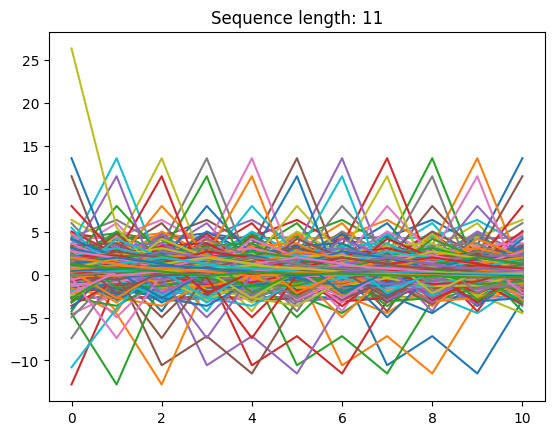

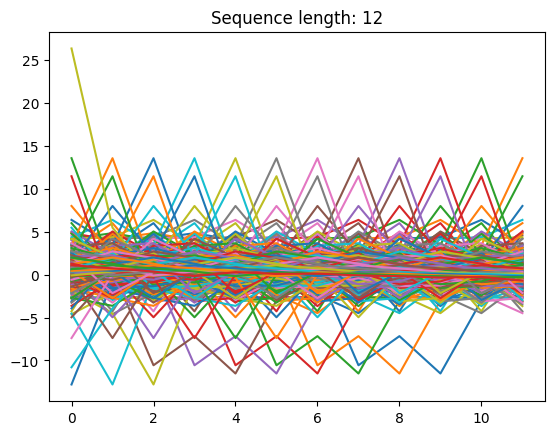

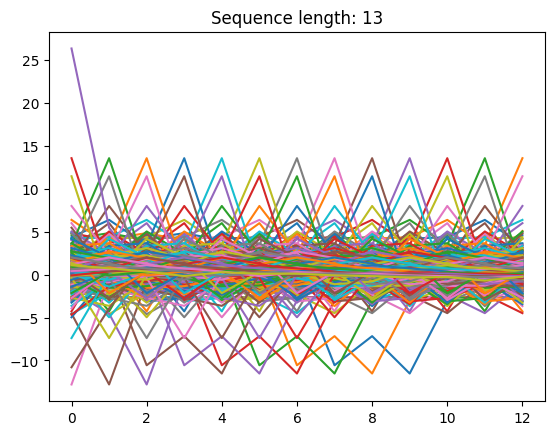

{11: [[4.22243609882,
   2.33772397905,
   4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213],
  [2.33772397905,
   4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084],
  [4.17355287,
   4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084,
   -1.68790701829],
  [4.83957116296,
   4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084,
   -1.68790701829,
   -0.189982022354],
  [4.00399883335,
   1.51389289413,
   0.518079621635,
   -10.5689647077,
   -7.17275854064,
   -11.5306575449,
   -3.00704761213,
   0.176999243084,
   -1.68790701829,
   -0.1899820

In [81]:
def plot_fshape_profiles(fshape_profiles_grupped_by_length):
    for sequence_length in fshape_profiles_grupped_by_length.keys():
        for profile in fshape_profiles_grupped_by_length[sequence_length]:
            plt.plot(profile)
        plt.title(f'Sequence length: {sequence_length}')
        plt.show()


def get_f_shape_profile_groups(found_fragments):
    fshape_profiles_grupped_by_length, patterns_grouped_by_length = {}, {}

    for sequence, profile in found_fragments:
        w = len(sequence)
        
        if w in fshape_profiles_grupped_by_length:
            fshape_profiles_grupped_by_length[w].append(profile)
        else:
            fshape_profiles_grupped_by_length[w] = [profile]
        
        if w in patterns_grouped_by_length:
            patterns_grouped_by_length[w].append(sequence)
        else:
            patterns_grouped_by_length[w] = [sequence]

    plot_fshape_profiles(fshape_profiles_grupped_by_length)

    return fshape_profiles_grupped_by_length, patterns_grouped_by_length


fshape_profiles_grupped_by_length_1, patterns_grouped_by_length_1 = get_f_shape_profile_groups(found_fragments_1)
fshape_profiles_grupped_by_length_1

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


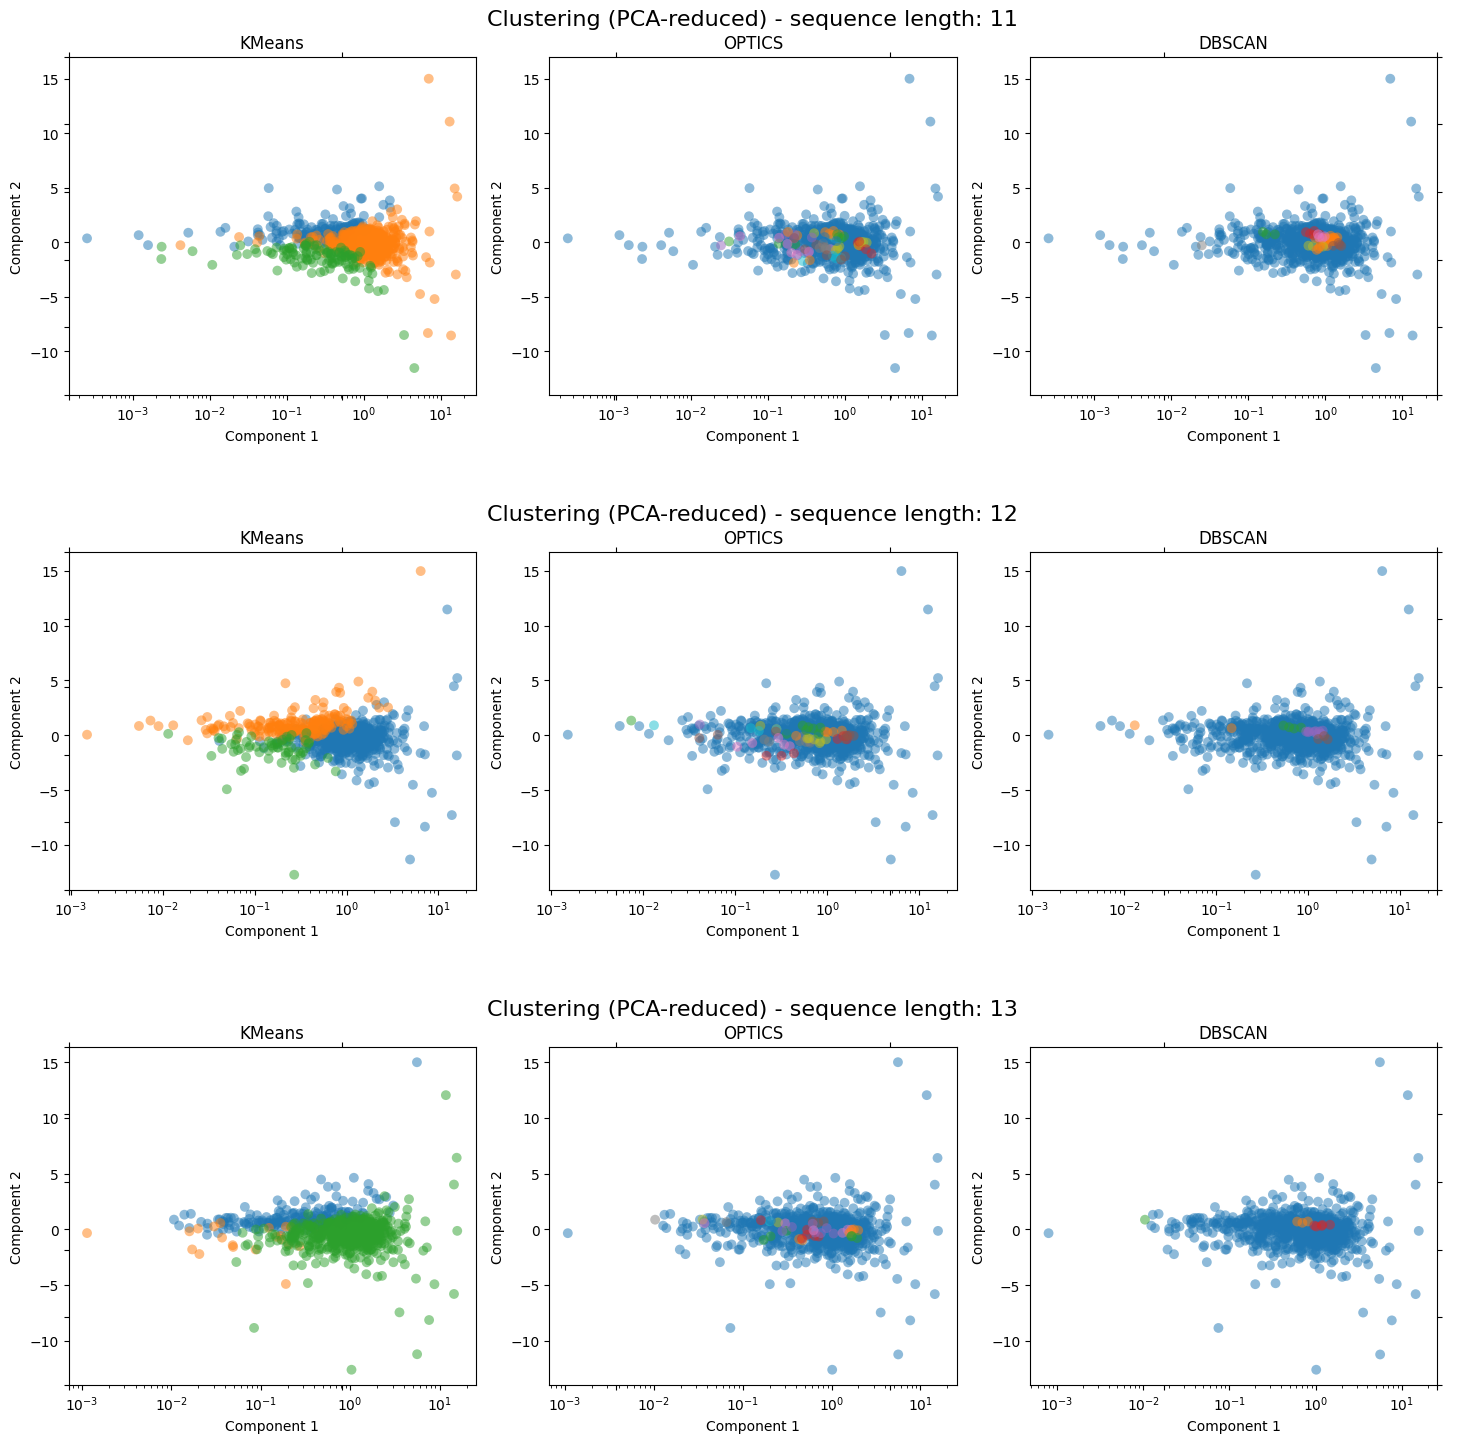

In [137]:
def clustering(data, model, model_name, ax):
    labels = model.fit_predict(data)

    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    for label in np.unique(labels):
        ax.scatter(data_2d[labels == label, 0], data_2d[labels == label, 1], s=50, alpha=0.5, edgecolors='none')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_xscale('log')
    ax.set_title(model_name)
    

    return labels

fig, big_axes = plt.subplots(figsize=(15.0, 15.0), ncols=1, nrows=3, sharey=True)
for i, sequence_length in enumerate(fshape_profiles_grupped_by_length_1.keys()):
    big_axes[i].set_title(f"Clustering (PCA-reduced) - sequence length: {sequence_length}\n", fontsize=16)
    big_axes[i].tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_axes[i]._frameon = False
    sequences = fshape_profiles_grupped_by_length_1[sequence_length]
    if len(sequences) >= 2:
        ax = fig.add_subplot(3, 3, 3*i+1)
        labels_kmeans = clustering(sequences, KMeans(n_clusters=3), 'KMeans', ax)
        ax = fig.add_subplot(3, 3, 3*i+2)
        labels_optics = clustering(sequences, OPTICS(min_samples=3), 'OPTICS', ax)
        ax = fig.add_subplot(3, 3, 3*i+3)
        labels_dbscan = clustering(sequences, DBSCAN(eps=0.65, min_samples=3), 'DBSCAN', ax)
plt.tight_layout()
plt.savefig(CLUSTER_ANALYSIS_PATH_1)
# plt.show()

In [133]:
def plot_motifs(cluster, cluster_fshapes, consensus_motif_idx, ax, color):
    for i, motif in enumerate(cluster_fshapes):
        label, lw = None, 1
        if i == consensus_motif_idx:
            label = f"Cluster {cluster} motifs"
            lw = 4
        ax.plot(stumpy.core.z_norm(motif), color=color, lw=lw, label=label)

Biggest clusters: [0 1 2]
[ 5 10 22]
Consensus motif for cluster 0: GAAGCCTTCAA
Consensus motif for cluster 1: CTTGTTGGCGT
Consensus motif for cluster 2: AGCTACCCTGT
Biggest clusters: [3 0 1]
[4 4 9]
Consensus motif for cluster 3: TGGAGTTAAAGA
Consensus motif for cluster 0: GCTGGGGGAAGT
Consensus motif for cluster 1: AGCTACCCTGTA
Biggest clusters: [2 0 1]
[3 3 5]
Consensus motif for cluster 2: GCTCCTTGAAGCT
Consensus motif for cluster 0: AGCTACCCTGTAA
Consensus motif for cluster 1: TGCCTTCCCTAGT


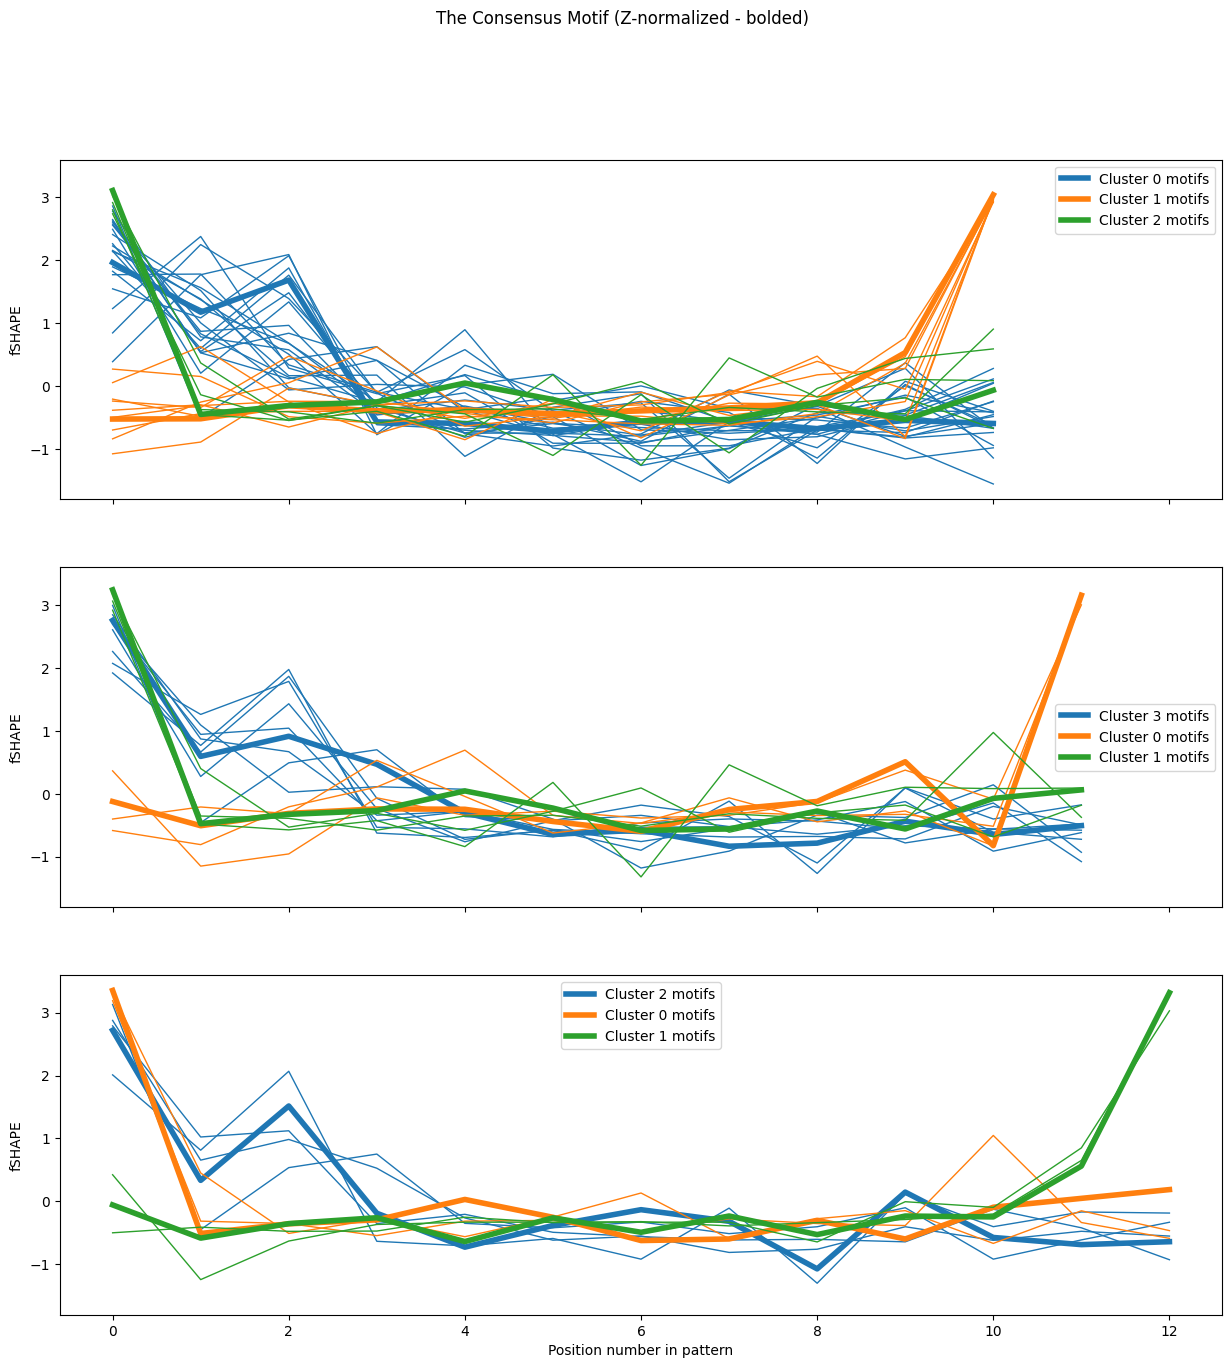

In [138]:
top_clusters_number = 3
consensus_patterns, consensus_fshapes = [''.join(expected_pattern_1["base"])], [expected_pattern_1["fshape_coef"].to_numpy()]

fig, axs = plt.subplots(figsize=(15, 15), nrows=3, sharex=True, sharey=True)
colors = sns.color_palette(n_colors=top_clusters_number)

for ax, pattern_length in zip(axs, fshape_profiles_grupped_by_length_1.keys()):
    curr_patterns, curr_fshapes = np.array(patterns_grouped_by_length_1[pattern_length]), np.array(fshape_profiles_grupped_by_length_1[pattern_length])
    y_pred = DBSCAN(eps=0.65, min_samples=3).fit_predict(curr_fshapes).astype(int)
    # y_pred = KMeans(n_clusters=3).fit_predict(curr_fshapes).astype(int)
    unique_labels, labels_count = np.unique(y_pred[y_pred != -1], return_counts=True)
    top_labels = unique_labels[np.argsort(-labels_count)][:top_clusters_number]
    
    print(f"Biggest clusters: {top_labels}")
    print(np.sort(labels_count)[-3:])
    for color, label in zip(colors, top_labels):
        cluster_patterns, cluster_fshapes = curr_patterns[y_pred == label], curr_fshapes[y_pred == label]
        _, idx, _ = stumpy.ostinato(cluster_fshapes.tolist(), pattern_length)

        consensus_motif = ''.join(cluster_patterns[idx])
        consensus_patterns.append(consensus_motif)
        consensus_fshapes.append(cluster_fshapes[idx])
        print(f'Consensus motif for cluster {label}: {consensus_motif}')
        plot_motifs(label, cluster_fshapes, idx, ax, color)

    ax.set_ylabel('fSHAPE')
    ax.legend()

fig.suptitle("The Consensus Motif (Z-normalized - bolded)")
plt.xlabel("Position number in pattern")
plt.savefig(MOTIFS_PATH_1)

In [122]:
def ssf(seq1: str, seq2: str) -> float:
    points = 0
    for s1, s2 in zip(seq1, seq2):
        if s1 == s2 or s1 == 'N' or s2 == 'N':
            points += 2
        elif (s1 == 'A' and s2 == 'G') or (s1 == 'G' and s2 == 'A') or (s1 == 'C' and s2 == 'U') or \
                (s1 == 'U' and s2 == 'C') or (s1 == 'C' and s2 == 'T') or (s1 == 'T' and s2 == 'C'):
            points += 1
    return float(points) / len(seq1)

def is_promising(pattern):
    if pattern.isnull().values.any():
        return False
    return (pattern > 1.0).any()

In [124]:
expected_pattern_1 = ''.join(expected_pattern_1["base"])
results = defaultdict(list)
for transcript_file in PATTERN_SEARCH_FOLDER_2.glob("*"):
    transcript_df = pd.read_csv(transcript_file, sep="\t", header=None, names=["fSHAPE", "base", "SHAPE"])
    for pattern, fshape in zip(consensus_patterns, consensus_fshapes):
        pattern_length = len(pattern)
        motifs_num = 0

        for i in range(transcript_df.shape[0] - pattern_length):
            pattern_df = transcript_df.iloc[i:i+pattern_length, :-1]
            if not is_promising(pattern_df["fSHAPE"]):
                continue
            z_norm = stumpy.core.mass(fshape, pattern_df["fSHAPE"])[0]
            if z_norm > 2.5:
                continue
            transcripted_pattern = ''.join(pattern_df["base"])
            ssf_value = None
            if pattern_length == expected_pattern_size_1:
                ssf_value = ssf(transcripted_pattern, expected_pattern_1)
            elif pattern_length == expected_pattern_size_1 + 1:
                ssf_value = max(ssf(transcripted_pattern, 'N' + expected_pattern_1), ssf(transcripted_pattern, expected_pattern_1 + 'N'))
            elif pattern_length == expected_pattern_size_1 + 2:
                ssf_value = ssf(transcripted_pattern, 'N' + expected_pattern_1 + 'N')
            aS_value = 10 * z_norm - ssf_value

            results[pattern].append(dict(nucleotide_sequence=transcripted_pattern, filename=transcript_file.name, start_idx=i+1,
                                         end_idx=i+pattern_length, znEd=z_norm, ssf=ssf_value, aS=aS_value))
            motifs_num += 1
        print(f"Found {motifs_num} motifs in {transcript_file.name}")
        
for motif in results:
    results[motif] = pd.DataFrame(results[motif]).sort_values(by=['aS'])

results[expected_pattern_1]

Found 25 motifs in hnrnpc_NM_000067_CA2.txt
Found 58 motifs in hnrnpc_NM_000067_CA2.txt
Found 44 motifs in hnrnpc_NM_000067_CA2.txt
Found 36 motifs in hnrnpc_NM_000067_CA2.txt


KeyboardInterrupt: 

In [ ]:
with pd.ExcelWriter(DESTINATION_PATH_1, engine='openpyxl', mode='w') as writer:
    for motif in results:
        results[motif].to_excel(writer, sheet_name=motif, index=False)

### Dataset `HNRNPC`

In [139]:
expected_pattern_2 = get_expected_pattern(DATASET_2_NAME)
expected_pattern_size_2 = expected_pattern_2.shape[0]
expected_pattern_2

fshape_coef base
0         0.00    N
1         1.25    T
2         1.15    T
3         3.00    T
4         1.70    T
5         0.10    N

In [66]:
promising_patterns_2 = get_promising_patterns(DATASET_2_NAME)
promising_patterns_2

['NTTTTN', 'NNTTTTN', 'NTTTTNN', 'NNTTTTNN']

In [67]:
found_fragments_2 = load_all_binding_sites_fshape(DATASET_2_NAME, promising_patterns_2)
print(f'Found {len(found_fragments_2)} frangments:')
found_fragments_2

Found 2140 frangments:


[('ACCTAA',
  [0.651593703737,
   0.249096043729,
   0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815]),
 ('CCTAAA',
  [0.249096043729,
   0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917]),
 ('CTAAAA',
  [0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607]),
 ('TAAAAT',
  [0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383]),
 ('AAAATG',
  [0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383,
   -0.216990561915]),
 ('AAATGG',
  [1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383,
   -0.216990561915,
   -0.130427999376]),
 ('CACCTAA',
  [-0.00731479753685,
   0.651593703737,
   0.249096043729,
   0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815]),
 ('ACCTAAA',
  [0.651593703737,
   0.249096043729,
   0.122076906199,
   0.2717426664

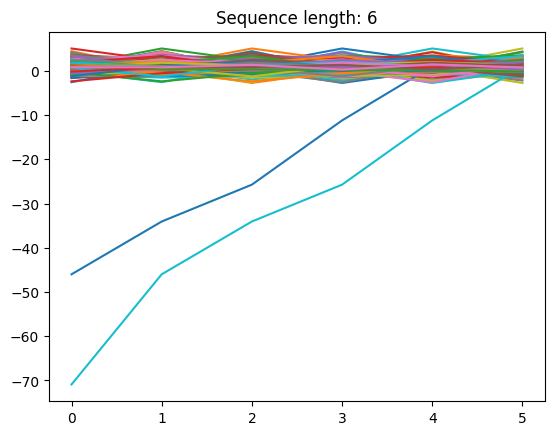

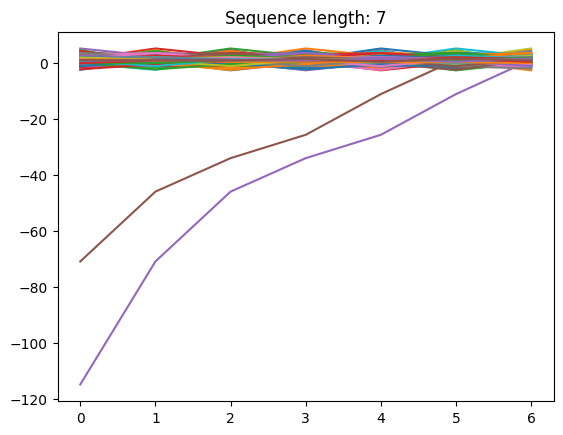

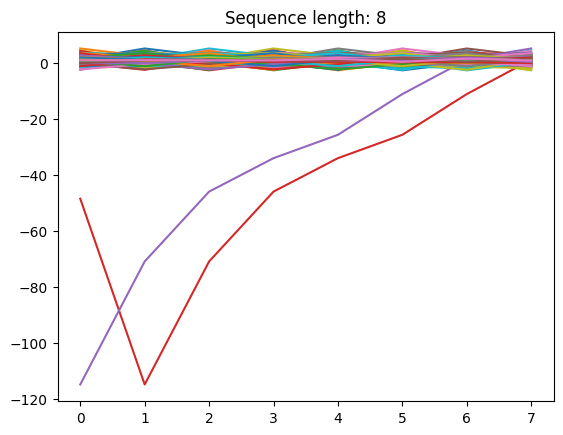

{6: [[0.651593703737,
   0.249096043729,
   0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815],
  [0.249096043729,
   0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917],
  [0.122076906199,
   0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607],
  [0.271742666469,
   0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383],
  [0.591197433604,
   1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383,
   -0.216990561915],
  [1.78560916815,
   0.391794333917,
   0.796215684607,
   0.431130452383,
   -0.216990561915,
   -0.130427999376],
  [0.0110160510004,
   -0.0713910126222,
   -0.103279780765,
   0.0984809781939,
   0.779491935824,
   1.42094634564],
  [-0.0713910126222,
   -0.103279780765,
   0.0984809781939,
   0.779491935824,
   1.42094634564,
   2.40945141431],
  [-0.103279780765,
   0.0984809781939,
   0.779491935824,
   1.4209463456

In [82]:
fshape_profiles_grupped_by_length_2, patterns_grouped_by_length_2 = get_f_shape_profile_groups(found_fragments_2)
fshape_profiles_grupped_by_length_2

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


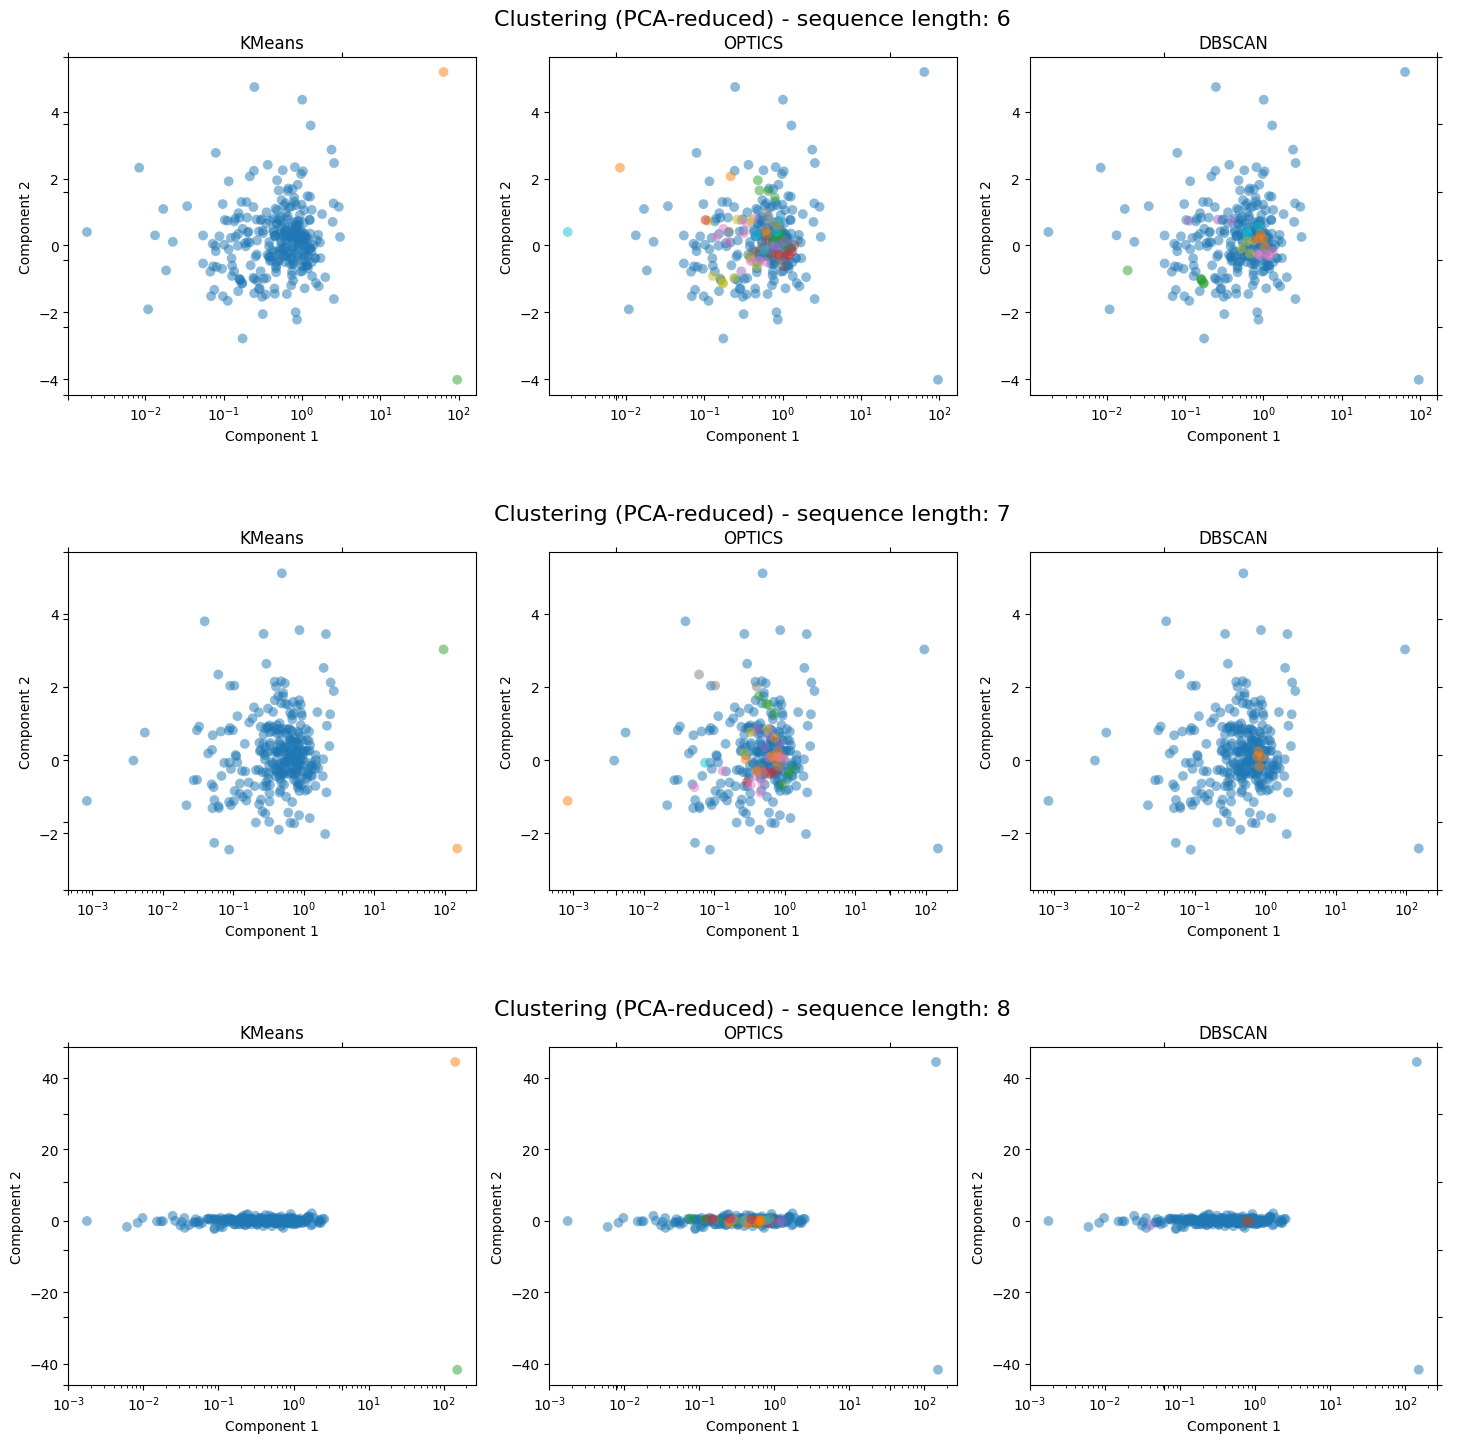

In [142]:
# for sequence_length in fshape_profiles_grupped_by_length_2.keys():
#     labels_kmeans = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, KMeans(n_clusters=2), 'KMeans')
#     labels_optics = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, OPTICS(), 'OPTICS')
#     labels_dbscan = clustering(fshape_profiles_grupped_by_length_2[sequence_length], sequence_length, DBSCAN(min_samples=3, eps=1), 'DBSCAN')
fig, big_axes = plt.subplots(figsize=(15.0, 15.0), ncols=1, nrows=3, sharey=True)
for i, sequence_length in enumerate(fshape_profiles_grupped_by_length_2.keys()):
    big_axes[i].set_title(f"Clustering (PCA-reduced) - sequence length: {sequence_length}\n", fontsize=16)
    big_axes[i].tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_axes[i]._frameon = False
    sequences = fshape_profiles_grupped_by_length_2[sequence_length]
    if len(sequences) >= 2:
        ax = fig.add_subplot(3, 3, 3*i+1)
        labels_kmeans = clustering(sequences, KMeans(n_clusters=3), 'KMeans', ax)
        ax = fig.add_subplot(3, 3, 3*i+2)
        labels_optics = clustering(sequences, OPTICS(min_samples=3), 'OPTICS', ax)
        ax = fig.add_subplot(3, 3, 3*i+3)
        labels_dbscan = clustering(sequences, DBSCAN(eps=0.4, min_samples=3), 'DBSCAN', ax)
plt.tight_layout()
# plt.savefig(CLUSTER_ANALYSIS_PATH_2)
plt.show()

Biggest clusters: [1 0 5]
[ 5  5 42]
Consensus motif for cluster 1: TCCACT
Consensus motif for cluster 0: CCCCAT
Consensus motif for cluster 5: CGCAGC
Biggest clusters: [1 0 2]
[ 3  4 24]
Consensus motif for cluster 1: TTGAGAC
Consensus motif for cluster 0: TCCGGTG
Consensus motif for cluster 2: AATTCTG
Biggest clusters: [2 0 1]
[ 3  3 12]
Consensus motif for cluster 2: AAACAGAC
Consensus motif for cluster 0: AATTCTGC
Consensus motif for cluster 1: TCCACTCT


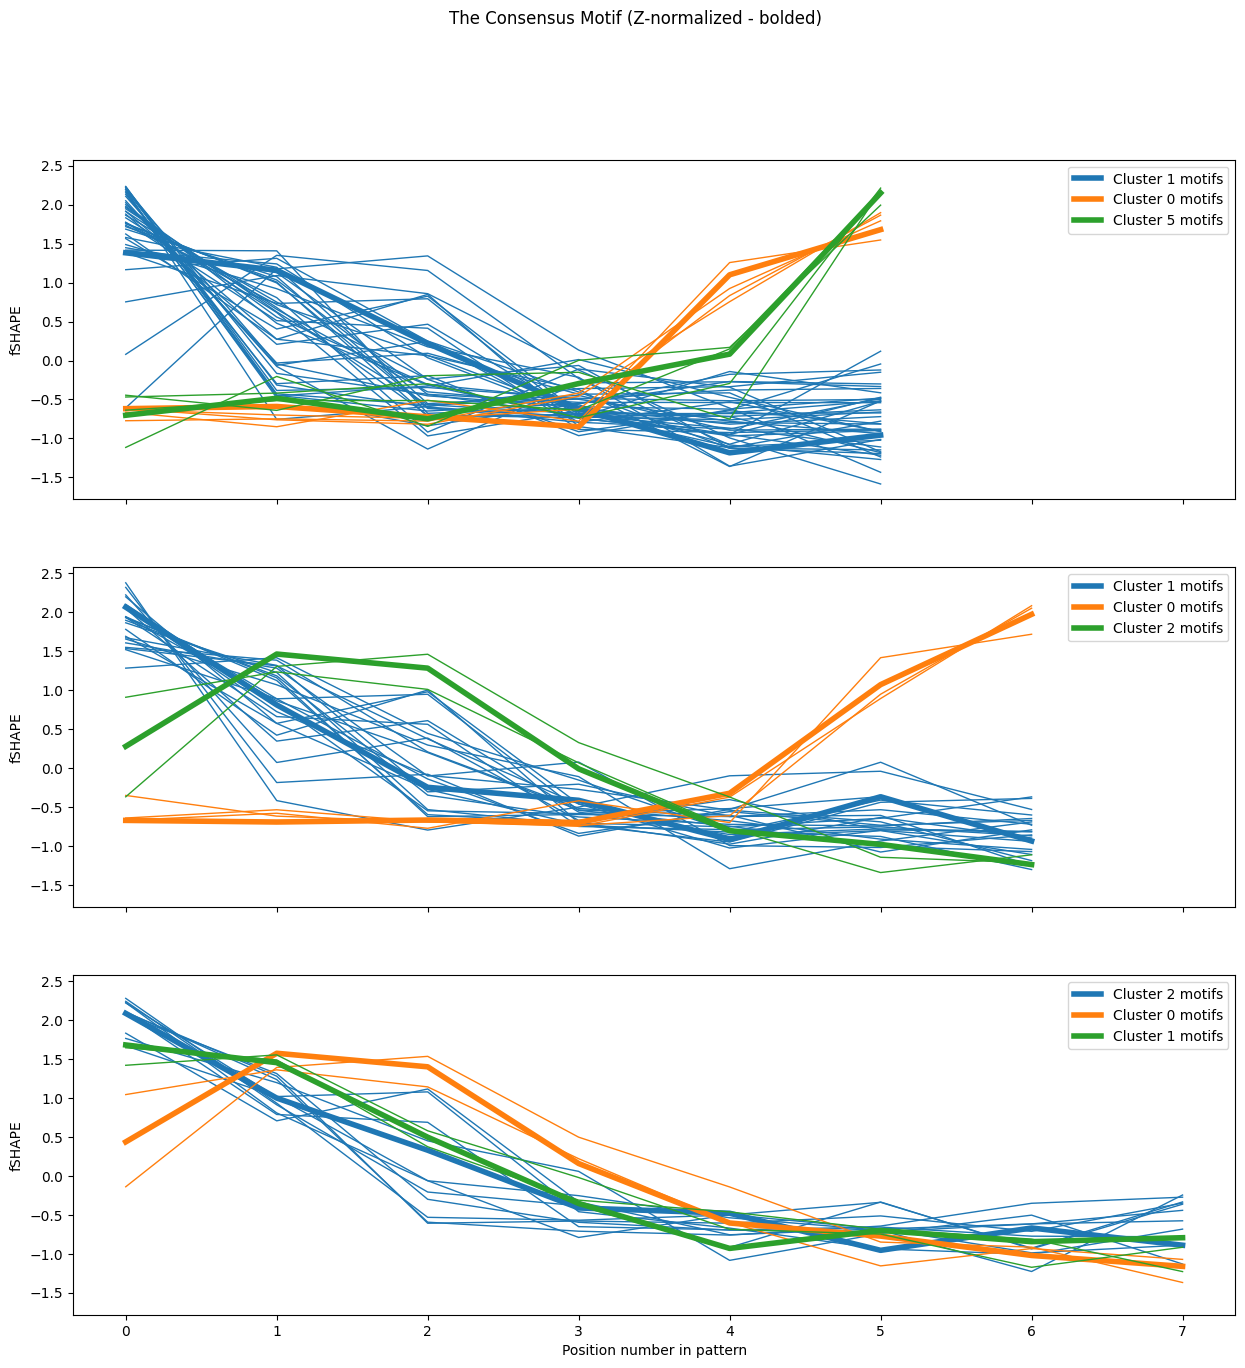

In [143]:
top_clusters_number = 3
consensus_patterns, consensus_fshapes = [''.join(expected_pattern_2["base"])], [expected_pattern_2["fshape_coef"].to_numpy()]

fig, axs = plt.subplots(figsize=(15, 15), nrows=3, sharex=True, sharey=True)
colors = sns.color_palette(n_colors=top_clusters_number)

for ax, pattern_length in zip(axs, fshape_profiles_grupped_by_length_2.keys()):
    curr_patterns, curr_fshapes = np.array(patterns_grouped_by_length_2[pattern_length]), np.array(fshape_profiles_grupped_by_length_2[pattern_length])
    y_pred = DBSCAN(eps=0.4, min_samples=3).fit_predict(curr_fshapes).astype(int)
    # y_pred = KMeans(n_clusters=3).fit_predict(curr_fshapes).astype(int)
    unique_labels, labels_count = np.unique(y_pred[y_pred != -1], return_counts=True)
    top_labels = unique_labels[np.argsort(-labels_count)][:top_clusters_number]
    
    print(f"Biggest clusters: {top_labels}")
    print(np.sort(labels_count)[-3:])
    for color, label in zip(colors, top_labels):
        cluster_patterns, cluster_fshapes = curr_patterns[y_pred == label], curr_fshapes[y_pred == label]
        _, idx, _ = stumpy.ostinato(cluster_fshapes.tolist(), pattern_length)

        consensus_motif = ''.join(cluster_patterns[idx])
        consensus_patterns.append(consensus_motif)
        consensus_fshapes.append(cluster_fshapes[idx])
        print(f'Consensus motif for cluster {label}: {consensus_motif}')
        plot_motifs(label, cluster_fshapes, idx, ax, color)

    ax.set_ylabel('fSHAPE')
    ax.legend()

fig.suptitle("The Consensus Motif (Z-normalized - bolded)")
plt.xlabel("Position number in pattern")    
# plt.savefig(MOTIFS_PATH_2)

In [115]:
expected_pattern_2 = ''.join(expected_pattern_2["base"])
results = defaultdict(list)
for transcript_file in PATTERN_SEARCH_FOLDER_2.glob("*"):
    transcript_df = pd.read_csv(transcript_file, sep="\t", header=None, names=["fSHAPE", "base", "SHAPE"])
    for pattern, fshape in zip(consensus_patterns, consensus_fshapes):
        pattern_length = len(pattern)
        motifs_num = 0

        for i in range(transcript_df.shape[0] - pattern_length):
            pattern_df = transcript_df.iloc[i:i+pattern_length, :-1]
            if not is_promising(pattern_df["fSHAPE"]):
                continue
            z_norm = stumpy.core.mass(fshape, pattern_df["fSHAPE"])[0]
            if z_norm > 2.5:
                continue
            transcripted_pattern = ''.join(pattern_df["base"])
            ssf_value = None
            if pattern_length == expected_pattern_size_2:
                ssf_value = ssf(transcripted_pattern, expected_pattern_2)
            elif pattern_length == expected_pattern_size_2 + 1:
                ssf_value = max(ssf(transcripted_pattern, 'N' + expected_pattern_2), ssf(transcripted_pattern, expected_pattern_2 + 'N'))
            elif pattern_length == expected_pattern_size_2 + 2:
                ssf_value = ssf(transcripted_pattern, 'N' + expected_pattern_2 + 'N')
            aS_value = 10 * z_norm - ssf_value

            results[pattern].append(dict(nucleotide_sequence=transcripted_pattern, filename=transcript_file.name, start_idx=i+1,
                                         end_idx=i+pattern_length, znEd=z_norm, ssf=ssf_value, aS=aS_value))
            motifs_num += 1
        print(f"Found {motifs_num} motifs in {transcript_file.name}")
        
for motif in results:
    results[motif] = pd.DataFrame(results[motif]).sort_values(by=['aS'])

results[expected_pattern_2]

Found 113 motifs in hnrnpc_NM_000067_CA2.txt
Found 187 motifs in hnrnpc_NM_000067_CA2.txt
Found 156 motifs in hnrnpc_NM_000067_CA2.txt
Found 136 motifs in hnrnpc_NM_000067_CA2.txt
Found 145 motifs in hnrnpc_NM_000067_CA2.txt
Found 135 motifs in hnrnpc_NM_000067_CA2.txt
Found 145 motifs in hnrnpc_NM_000067_CA2.txt
Found 142 motifs in hnrnpc_NM_000067_CA2.txt
Found 130 motifs in hnrnpc_NM_000067_CA2.txt
Found 144 motifs in hnrnpc_NM_000067_CA2.txt
Found 56 motifs in hnrnpc_NM_000422_KRT17.txt
Found 77 motifs in hnrnpc_NM_000422_KRT17.txt
Found 71 motifs in hnrnpc_NM_000422_KRT17.txt
Found 65 motifs in hnrnpc_NM_000422_KRT17.txt
Found 56 motifs in hnrnpc_NM_000422_KRT17.txt
Found 58 motifs in hnrnpc_NM_000422_KRT17.txt
Found 51 motifs in hnrnpc_NM_000422_KRT17.txt
Found 50 motifs in hnrnpc_NM_000422_KRT17.txt
Found 46 motifs in hnrnpc_NM_000422_KRT17.txt
Found 51 motifs in hnrnpc_NM_000422_KRT17.txt
Found 18 motifs in hnrnpc_NM_000581_GPX1.txt
Found 28 motifs in hnrnpc_NM_000581_GPX1.txt


nucleotide_sequence                              filename  start_idx   
2341              GCCATA             hnrnpc_NM_017527_LY6K.txt        609  \
76                TGATTT              hnrnpc_NM_000067_CA2.txt       1038   
1521              GTCCCT            hnrnpc_NM_002116_HLA-A.txt       1158   
1514              ACGGAG            hnrnpc_NM_002116_HLA-A.txt        838   
517               ACTGCG        hnrnpc_NM_001195129_PRSS56.txt       1396   
2304              GTCTTA           hnrnpc_NM_014220_TM4SF1.txt        764   
1431              CTTTTT             hnrnpc_NM_001875_CPS1.txt       4920   
1461              TCTTTT             hnrnpc_NM_001875_CPS1.txt       5262   
678               GCCCCG  hnrnpc_NM_001320643_LOC102724428.txt         11   
2484              GGCACT          hnrnpc_NM_080388_S100A16.txt        580   
2527              TCCGTG           hnrnpc_NM_133467_CITED4.txt        760   
802               GGTGCA             hnrnpc_NM_001631_ALPI.txt       1489   
1943              GAAGAC         hnrnpc_NM_005567_LGALS3BP.txt       1304   
1321              GTCCTT             hnrnpc_NM_001875_CPS1.txt       3240   
1324              CATATC             hnrnpc_NM_001875_CPS1.txt       3294   
88                ATGGTT              hnrnpc_NM_000067_CA2.txt       1314   
1466              ATTCTC             hnrnpc_NM_001875_CPS1.txt       5350   
1901              GGCGCC         hnrnpc_NM_005567_LGALS3BP.txt        267   
2050              ACTGTA             hnrnpc_NM_005627_SGK1.txt       2289   
2462              AGAAAG          hnrnpc_NM_080388_S100A16.txt        371   
1848              TCAGAC            hnrnpc_NM_005514_HLA-B.txt         76   
1941              AGGCCC         hnrnpc_NM_005567_LGALS3BP.txt       1288   
299               TAAAAT          hnrnpc_NM_001136025_PLS3.txt        635   
2552              GAAGGC             hnrnpc_NM_206917_BEX3.txt        434   
1930              GAACTT         hnrnpc_NM_005567_LGALS3BP.txt       1034   
5                 AAACAC              hnrnpc_NM_000067_CA2.txt        205   
2101              CAAGTC            hnrnpc_NM_005860_FSTL3.txt       1897   
842               CTCGCC             hnrnpc_NM_001632_ALPP.txt        242   
2021              TTCTTC             hnrnpc_NM_005627_SGK1.txt       1591   
347               AAATTA          hnrnpc_NM_001136025_PLS3.txt       1170   
358               CTATTA          hnrnpc_NM_001136025_PLS3.txt       1308   
1408              ACTACA             hnrnpc_NM_001875_CPS1.txt       4604   
2095              GCTGTC            hnrnpc_NM_005860_FSTL3.txt       1804   
2325              GGCTGC             hnrnpc_NM_017527_LY6K.txt        111   
926               GCCTGG             hnrnpc_NM_001632_ALPP.txt       1735   
1967              GACTTT             hnrnpc_NM_005627_SGK1.txt        198   
43                TAAAAC              hnrnpc_NM_000067_CA2.txt        678   
249               GCCTCT         hnrnpc_NM_001017365_C4BPB.txt        348   
1024              CTCTTC              hnrnpc_NM_001831_CLU.txt        754   
1440              TGATAA             hnrnpc_NM_001875_CPS1.txt       5067   
1385              GGTTTC             hnrnpc_NM_001875_CPS1.txt       4288   
479               GTCTAC        hnrnpc_NM_001195129_PRSS56.txt       1097   
2154              TCATAG            hnrnpc_NM_005980_S100P.txt        126   
2544              AGAAAT             hnrnpc_NM_133639_RHOV.txt        518   
32                CTGTGC              hnrnpc_NM_000067_CA2.txt        578   
1603              CCCATC             hnrnpc_NM_002901_RCN1.txt       2145   
1894              CTGGGC         hnrnpc_NM_005567_LGALS3BP.txt        160   
2460              CAGCCT          hnrnpc_NM_080388_S100A16.txt        321   
296               ATGAAC          hnrnpc_NM_001136025_PLS3.txt        579   
111               ATTGTA              hnrnpc_NM_000067_CA2.txt       1626   
1644              CCTGCG            hnrnpc_NM_004181_UCHL1.txt        233   
4

In [118]:
with pd.ExcelWriter(DESTINATION_PATH_2, engine='openpyxl', mode='w') as writer:
    for motif in results:
        results[motif].to_excel(writer, sheet_name=motif, index=False)